In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sodapy import Socrata
pd.set_option('display.max_columns', None)

In [6]:
import sys
sys.path.append("../src")

import preprocessor
import config

In [12]:
# Authenticated client:
client = Socrata('data.cityofnewyork.us',
                     config.api_key,
                     config.api_username,
                     config.api_password)

# First 5000 results, returned as JSON from API / converted to
# Python list of dictionaries by sodapy
results = client.get("2upf-qytp", limit=5000)

# Convert to pandas DataFrame and get a smaller sample to try out functions
results_df = pd.DataFrame.from_records(results)
sample = results_df.sample(frac=.2, random_state=123)

# clean the dataframe with a pipe
taxidf_cleaned = (sample.
                  pipe(preprocessor.rename_cols).
                  pipe(preprocessor.make_numeric).
                  pipe(preprocessor.make_trip_speed).
                  pipe(preprocessor.replace_vals).
                  pipe(preprocessor.make_dummies))


# read in taxi_zones csv to merge
# read in taxi_zones csv to merge
taxi_zones = pd.read_csv('../data/taxi+_zone_lookup.csv')
merged = preprocessor.merge_dfs(taxidf_cleaned, taxi_zones)
final_df = (merged.
            pipe(preprocessor.replace_nans).
            pipe(preprocessor.reorder_cols))

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Vendor Id                 1000 non-null   object        
 1   Pickup Datetime           1000 non-null   datetime64[ns]
 2   Dropoff Datetime          1000 non-null   datetime64[ns]
 3   Passenger Count           1000 non-null   int64         
 4   Trip Distance             1000 non-null   float64       
 5   Trip Time (hrs)           1000 non-null   float64       
 6   Trip Speed (mph)          1000 non-null   float64       
 7   Rate Code Id              1000 non-null   object        
 8   Store and Forward         1000 non-null   bool          
 9   Pick Up Location Id       1000 non-null   int64         
 10  Borough_PickUp            1000 non-null   object        
 11  Zone_PickUp               1000 non-null   object        
 12  service_zone_PickUp  

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Vendor Id                 1000 non-null   object        
 1   Pickup Datetime           1000 non-null   datetime64[ns]
 2   Dropoff Datetime          1000 non-null   datetime64[ns]
 3   Passenger Count           1000 non-null   int64         
 4   Trip Distance             1000 non-null   float64       
 5   Trip Time (hrs)           1000 non-null   float64       
 6   Trip Speed (mph)          1000 non-null   float64       
 7   Rate Code Id              1000 non-null   object        
 8   Store and Forward         1000 non-null   bool          
 9   Pick Up Location Id       1000 non-null   int64         
 10  Borough_PickUp            1000 non-null   object        
 11  Zone_PickUp               1000 non-null   object        
 12  service_zone_PickUp  

In [55]:
def plot_top_locations(df, col, title, xaxis, color):
    fig, ax = plt.subplots(dpi=150)
    plot = ax.barh(df.index, df[col], color=color)
    ax.set_title(title, fontsize=16)
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top = ax.spines["top"]
    top.set_visible(False)
    ax.set_xlabel(xaxis)

    for i, v in enumerate(df['Trip Time (hrs)']):
        plt.text(v+0.2, i-.15, str(round(v)), fontsize=10)
    plt.tight_layout()
    plt.show()

In [65]:
pu_table = final_df.groupby('Zone_PickUp').count()
pu_table = pu_table.sort_values('Pick Up Location Id', ascending=False)[:10]
pu_table


,Vendor Id,Pickup Datetime,Dropoff Datetime,Passenger Count,Trip Distance,Trip Time (hrs),Trip Speed (mph),Rate Code Id,Store and Forward,Pick Up Location Id,Borough_PickUp,service_zone_PickUp,Drop Off Location Id,Borough_DropOff,Zone_DropOff,service_zone_DropOff,Fare Amount,Extra,MTA Tax,Tip Amount,Tolls Amount,Improvement Surcharge,Total Amount,Congestion Surcharge,Payment Type_Cash,Payment Type_Credit Card,Payment Type_No Charge,Payment Type_nan,Payment Type_Dispute
Zone_PickUp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Upper East Side South,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
Midtown East,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
Midtown Center,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Union Sq,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
Times Sq/Theatre District,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
JFK Airport,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Lincoln Square East,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Upper East Side North,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
Murray Hill,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


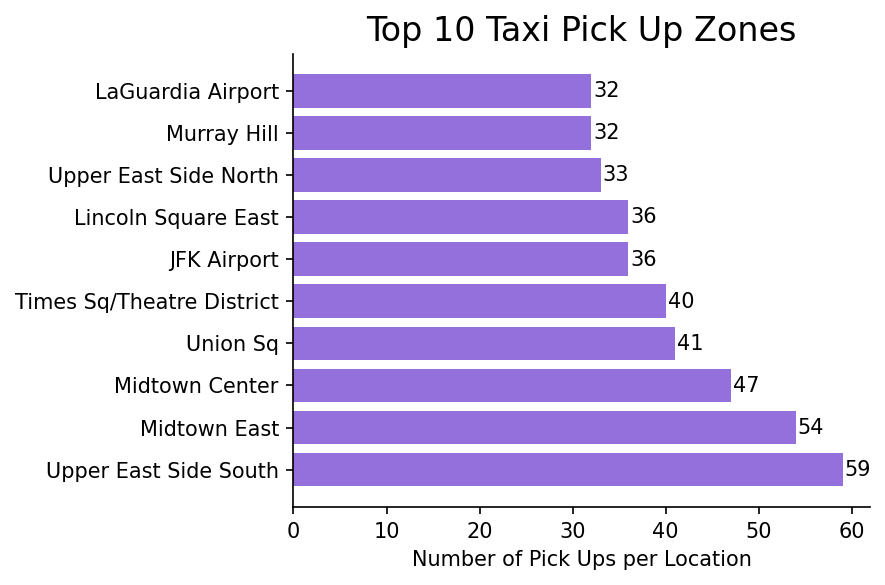

In [57]:
plot_top_locations(pu_table, 'Pick Up Location Id', 
                   'Top 10 Taxi Pick Up Zones', 
                   'Number of Pick Ups per Location', 
                   'mediumpurple')

In [61]:
do_table = final_df.groupby('Zone_DropOff').count()
do_table = do_table.sort_values('Drop Off Location Id', ascending=False)[:10]

,Vendor Id,Pickup Datetime,Dropoff Datetime,Passenger Count,Trip Distance,Trip Time (hrs),Trip Speed (mph),Rate Code Id,Store and Forward,Pick Up Location Id,Borough_PickUp,Zone_PickUp,service_zone_PickUp,Drop Off Location Id,Borough_DropOff,service_zone_DropOff,Fare Amount,Extra,MTA Tax,Tip Amount,Tolls Amount,Improvement Surcharge,Total Amount,Congestion Surcharge,Payment Type_Cash,Payment Type_Credit Card,Payment Type_No Charge,Payment Type_nan,Payment Type_Dispute
Zone_DropOff,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Upper East Side North,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
Upper East Side South,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Murray Hill,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
Upper West Side South,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Lenox Hill West,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Clinton East,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Lincoln Square East,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Penn Station/Madison Sq West,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Sutton Place/Turtle Bay North,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


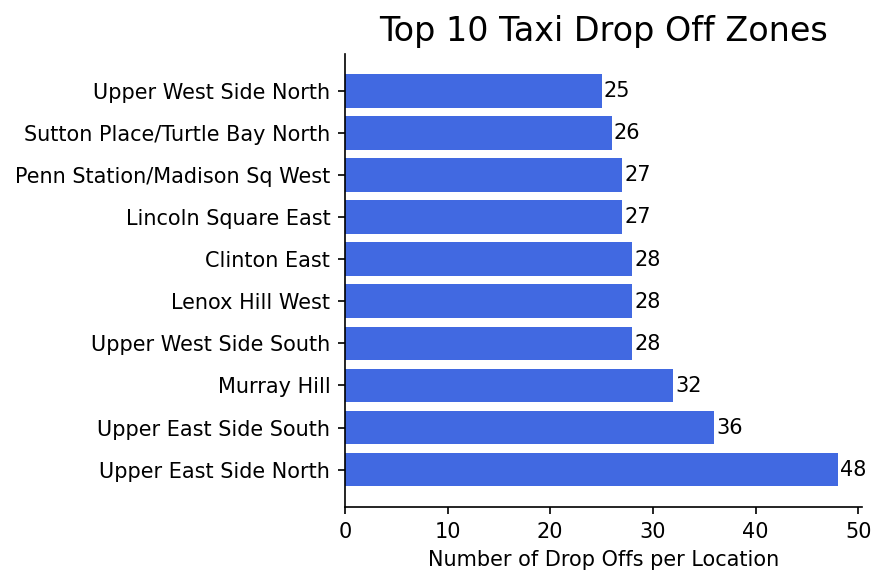

In [59]:
plot_top_locations(do_table, 'Drop Off Location Id', 
                   'Top 10 Taxi Drop Off Zones', 
                   'Number of Drop Offs per Location', 'royalblue')

# Calculate and Display The Number of Disputed Transactions

In [75]:
disputed = final_df[final_df['Payment Type_Dispute'] == 1][['Zone_PickUp', 'Zone_DropOff', 'Trip Time (hrs)', 'Trip Speed (mph)']]
disputed = disputed[['Zone_PickUp', 'Zone_DropOff', 'Trip Time (hrs)', 'Trip Speed (mph)']]

In [76]:
# get the rate of disputed payments

disputed.shape[0]/final_df.shape[0]

0.002

## Pu and drop off locatain of disputed charges:  Use The same graphing function to show pick up and drop off locations of the disputed charges

In [91]:
disputed_pu = disputed.groupby('Zone_PickUp').count()
disputed_pu = disputed_up.sort_values('Trip Speed (mph)', ascending=False)[:10]
disputed_pu

,Zone_DropOff,Trip Time (hrs),Trip Speed (mph)
Zone_PickUp,,,
Clinton East,1,1,1
Union Sq,1,1,1


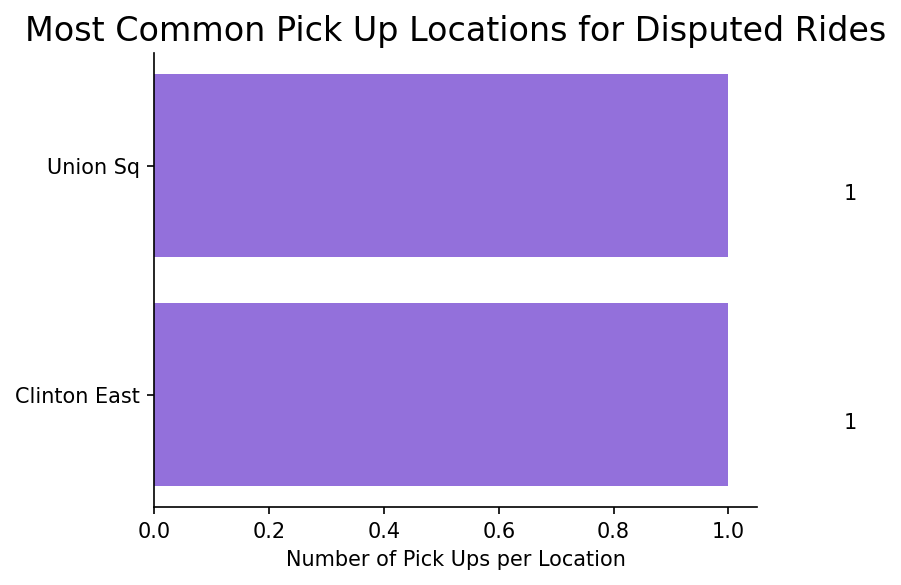

In [97]:
plot_top_locations(disputed_pu, 'Trip Speed (mph)', 
                   'Most Common Pick Up Locations for Disputed Rides',
                   'Number of Pick Ups per Location', 'mediumpurple')

In [93]:
disputed_do = disputed.groupby('Zone_DropOff').count()
disputed_do = disputed_do.sort_values('Trip Speed (mph)', ascending=False)[:10]
disputed_do

,Zone_PickUp,Trip Time (hrs),Trip Speed (mph)
Zone_DropOff,,,
Lincoln Square West,1,1,1
UN/Turtle Bay South,1,1,1


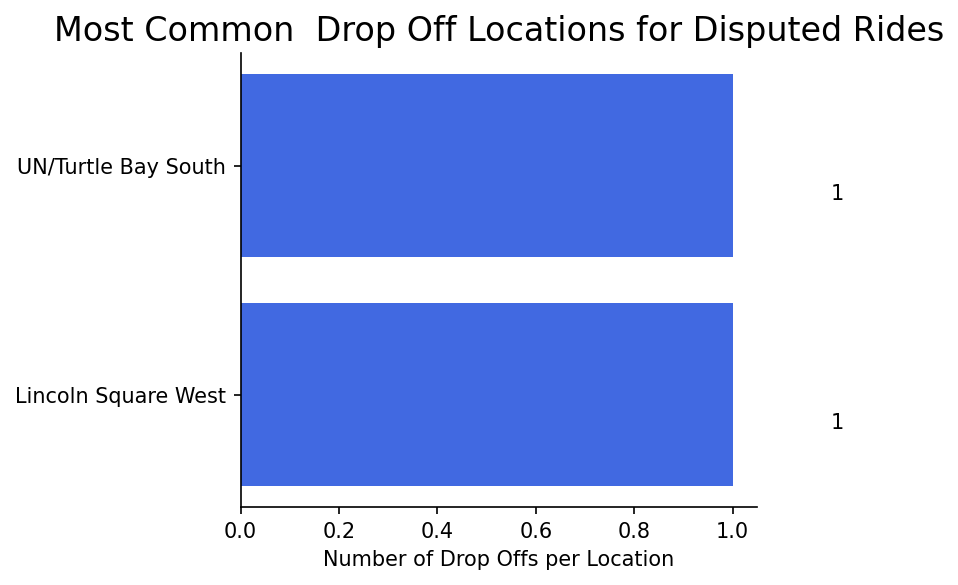

In [96]:
plot_top_locations(disputed_do, 'Trip Speed (mph)', 
                   'Most Common  Drop Off Locations for Disputed Rides',
                   'Number of Drop Offs per Location', 'royalblue')

## Other info about the disputed rides

In [24]:
np.average(disputed['Trip Speed (mph)'])


7.205

In [46]:
np.average(disputed['Trip Time (hrs)']).round(3)

0.21

In [42]:
np.average(final_df['Trip Time (hrs)'])


0.3115

In [ ]:
np.average(final_df['Trip Speed (mph)']) # this gives an infinite ansewr 

In [41]:
final_df[final_df['Trip Speed (mph)']==0]

,Vendor Id,Pickup Datetime,Dropoff Datetime,Passenger Count,Trip Distance,Trip Time (hrs),Trip Speed (mph),Rate Code Id,Store and Forward,Pick Up Location Id,Borough_PickUp,Zone_PickUp,service_zone_PickUp,Drop Off Location Id,Borough_DropOff,Zone_DropOff,service_zone_DropOff,Fare Amount,Extra,MTA Tax,Tip Amount,Tolls Amount,Improvement Surcharge,Total Amount,Congestion Surcharge,Payment Type_Cash,Payment Type_Credit Card,Payment Type_No Charge,Payment Type_nan,Payment Type_Dispute
87,Creative Mobole,2019-12-05 20:52:55,2019-12-05 20:54:00,1,0.0,0.02,0.0,Standard rate,False,168,Bronx,Mott Haven/Port Morris,Boro Zone,168,Bronx,Mott Haven/Port Morris,Boro Zone,3.00,0.5,0.5,0.00,0.0,0.3,4.30,0.0,1,0,0,0,0
92,Creative Mobole,2019-12-05 20:31:30,2019-12-05 21:04:36,1,0.0,0.55,0.0,Standard rate,False,211,Manhattan,SoHo,Yellow Zone,123,Brooklyn,Homecrest,Boro Zone,28.20,0.0,0.5,0.00,0.0,0.3,29.00,0.0,0,1,0,0,0
143,VeriFone,2019-12-05 20:29:34,2019-12-05 20:30:03,1,0.0,0.01,0.0,Standard rate,False,161,Manhattan,Midtown Center,Yellow Zone,161,Manhattan,Midtown Center,Yellow Zone,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5,1,0,0,0,0
235,VeriFone,2019-12-05 20:58:48,2019-12-05 20:58:55,1,0.0,0.00,0.0,Negotiated fare,False,193,Queens,Queensbridge/Ravenswood,Boro Zone,264,Unknown,NV,Unknown,0.05,0.0,0.0,0.00,0.0,0.3,0.35,0.0,0,1,0,0,0
456,Creative Mobole,2019-12-05 20:28:55,2019-12-05 21:17:02,1,0.0,0.80,0.0,Standard rate,False,79,Manhattan,East Village,Yellow Zone,76,Brooklyn,East New York,Boro Zone,26.20,0.0,0.5,0.00,0.0,0.3,27.00,0.0,0,1,0,0,0
544,VeriFone,2019-12-05 20:02:27,2019-12-05 20:04:49,6,0.0,0.04,0.0,Negotiated fare,False,51,Bronx,Co-Op City,Boro Zone,51,Bronx,Co-Op City,Boro Zone,60.00,0.0,0.5,3.00,0.0,0.3,63.80,0.0,0,1,0,0,0
823,VeriFone,2019-12-05 20:00:15,2019-12-05 20:00:34,2,0.0,0.01,0.0,Negotiated fare,False,237,Manhattan,Upper East Side South,Yellow Zone,237,Manhattan,Upper East Side South,Yellow Zone,13.30,0.0,0.0,3.22,0.0,0.3,19.32,2.5,0,1,0,0,0
901,VeriFone,2019-12-05 16:58:29,2019-12-05 16:58:31,1,0.0,0.00,0.0,Standard rate,False,264,Unknown,NV,Unknown,264,Unknown,NV,Unknown,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,1,0,0,0,0
